Epoch [10/100], Loss: 0.1866
Epoch [20/100], Loss: 0.0855
Epoch [30/100], Loss: 0.0674
Epoch [40/100], Loss: 0.0537
Epoch [50/100], Loss: 0.0433
Epoch [60/100], Loss: 0.0353
Epoch [70/100], Loss: 0.0292
Epoch [80/100], Loss: 0.0246
Epoch [90/100], Loss: 0.0211
Epoch [100/100], Loss: 0.0184
Learned slope (o1): 2.680460214614868
Learned intercept (o0): 1.677017092704773


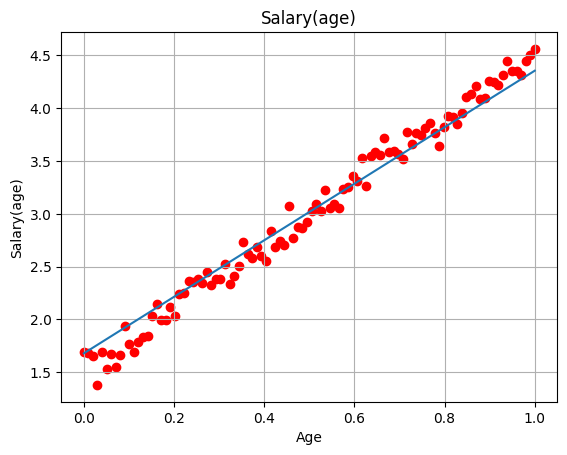

In [76]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)

X = torch.linspace(0, 1, 100).view(-1, 1)
true_slope = 3.0
true_intercept = 1.5
y = true_slope * X + true_intercept + 0.1 * torch.randn(X.size())

class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def print_parameters(self):
        for name, param in self.named_parameters():
            print(f"{name}: {param.data}")
        print("\n", list(self.parameters()))
    
    def forward(self, X):
        return self.linear(X)

model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

number_of_epochs = 100
losses = []

for epoch in range(number_of_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    losses.append(loss.item())
    optimizer.zero_grad() # Clearing gradients
    loss.backward() # Calculting gradients
    optimizer.step() # Adjusting gradients for new weights 
    #print(model.linear.weight.grad) 
    #print(model.linear.bias.grad)

    if (epoch +1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{number_of_epochs}], Loss: {loss.item():.4f}") 
    
learned_slope = model.linear.weight.item()
learned_intercept = model.linear.bias.item()

# h(x) = o1*x + o0
print(f"Learned slope (o1): {learned_slope}")
print(f"Learned intercept (o0): {learned_intercept}")

plt.scatter(
    X, y, color="red"
)
plt.title("Salary(age)")
plt.xlabel("Age")
plt.ylabel("Salary(age)")
plt.plot(X.numpy(), y_predicted.detach().numpy())
plt.grid(True)